In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
dtrain = {'X':[1,2,3,4,5], 'Y':[3,4,2,4,5]}
df = pd.DataFrame(data=dtrain)
df

,X,Y
0,1,3
1,2,4
2,3,2
3,4,4
4,5,5


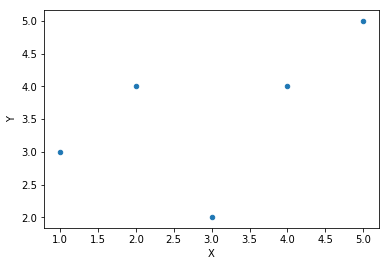

In [140]:
df.plot(kind="scatter", x="X", y="Y")

In [141]:
class LinearRegression:
    
    def __init__(self):
        self.m = 0
        self.c = 0
        print("Object has been created")
        
    def fit(self,df):
        '''m = sum((x-meanX)(y-meanY))/sum((x-meanX)^2)'''
        '''c = meanY-(m*meanX)'''
        meanX = np.mean(df['X'])
        meanY = np.mean(df['Y'])
        num = np.sum( (df['X']-meanX) * (df['Y']-meanY) )
        den = np.sum( (df['X']-meanX) ** 2 )
        self.m = num/den
        self.c = meanY-(self.m*meanX)
        print("Done")
        print("Y = {0}X+{1}".format(self.m,self.c))
    
    def predict(self,xdf):
        ypred = [(self.m*val)+self.c for val in xdf['X']]
        xdf.plot(kind="scatter", x='X', y='Y', color='r')
        plt.plot(xdf['X'], ypred, marker='o', color='b')
        return pd.DataFrame(data=ypred)
    

In [142]:
#Build Model
model = LinearRegression()
model.fit(df)

Object has been created
Done
Y = 0.4X+2.4


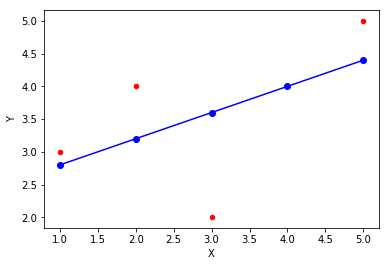

In [143]:
#Predict
ypred = model.predict(df)

<p>Here, <b style="color:red;">Red</b> points are the actual values and <b style="color:red;">Blue</b> points are the predicted values</p>

<h3>Checking goodness of fit using R<sup>2</sup></h3>
<p>R-squared value is a statistical measure of how close the data are to the fitted regression line</p>

In [144]:
#calculate performance with R^2
def Rsquare(df,ypred):
        '''R^2 = sum[(Ypred-Ymean)^2]/sum[(Y-Ymean)^2]'''
        num = np.sum((ypred-np.mean(df['Y']))**2)
        den = np.sum((df['Y']-np.mean(df['Y']))**2)
        return num/den
print(Rsquare(df,ypred))        

0    0.307692
dtype: float64
